In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
pd.options.mode.chained_assignment = None 

In [8]:
df = pd.read_csv('C:/Users/jutnl/recursiveparadox/StockProphet/Data/SPX_3_18_2024.csv')

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df['Open'][df['Open'] <= 0] = df['Close'].shift(1).values

In [10]:
df["% change close"] = (df['Close'] - df['Close'].shift(1))/df['Close'].shift(1)

In [325]:
p = PdfPages("leverage over 25 years log.pdf") 

the year is 1960


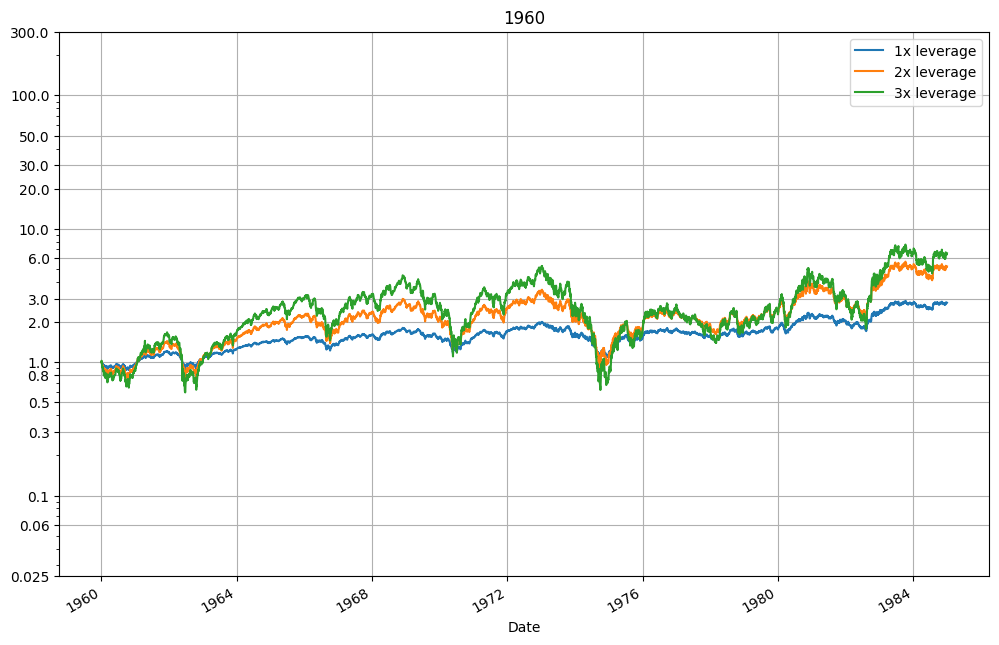

-------------------------
the year is 1961


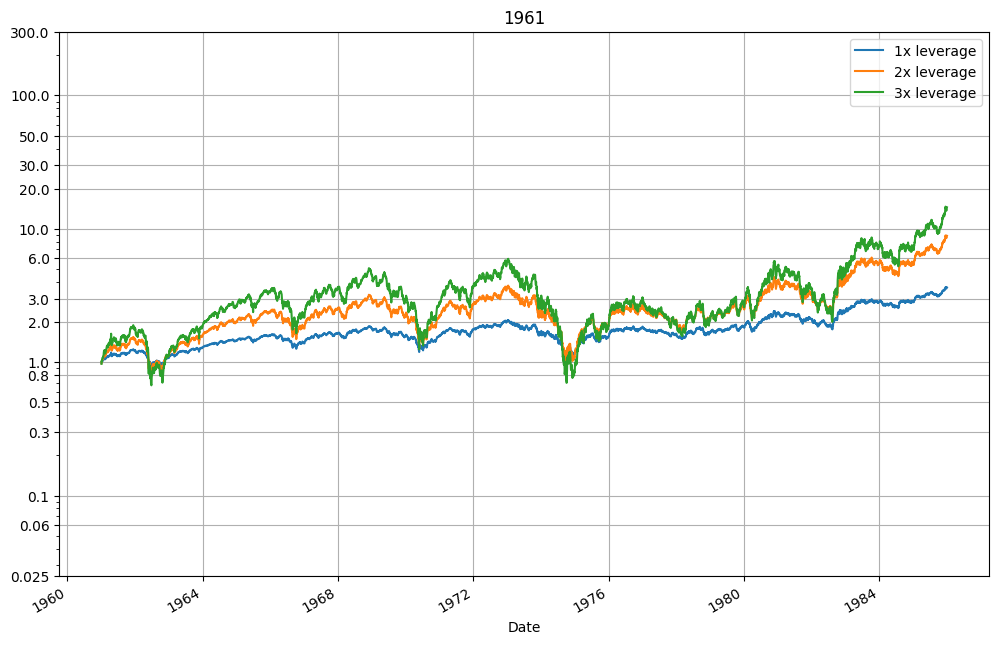

-------------------------
the year is 1962


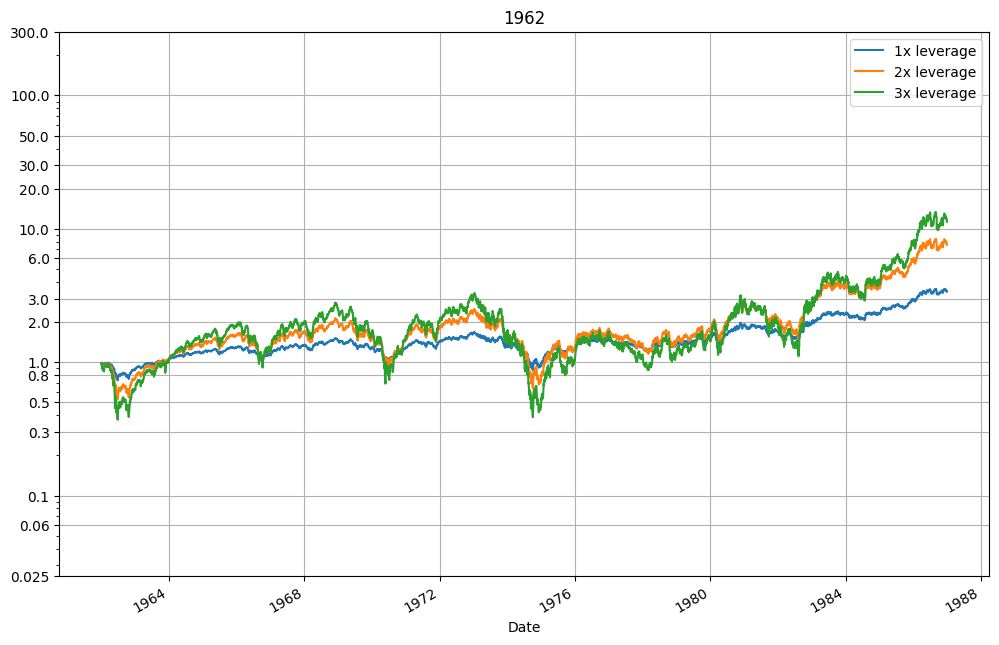

-------------------------
the year is 1963


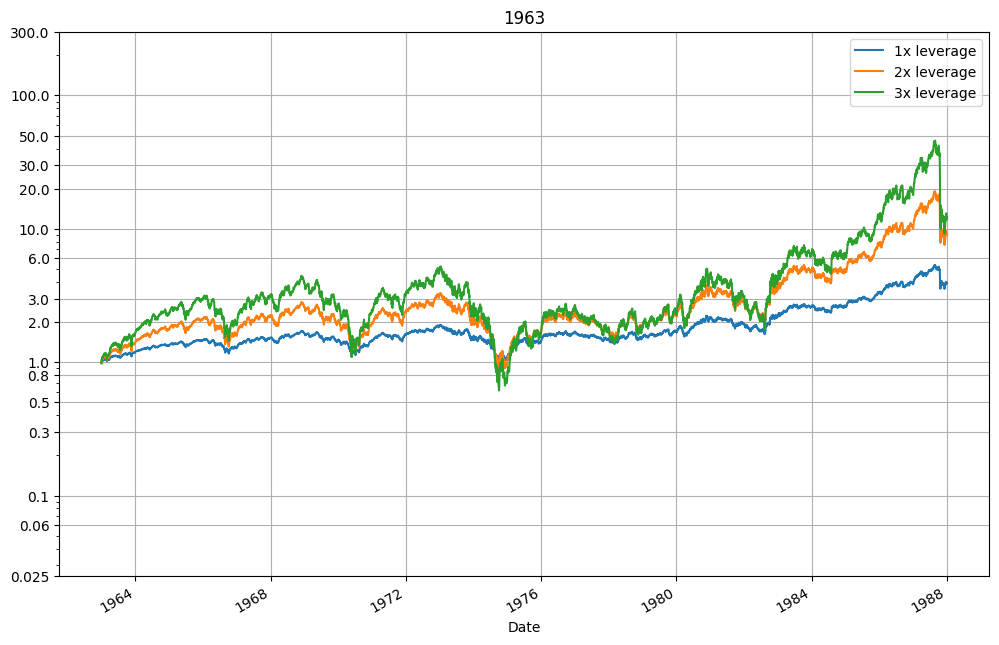

-------------------------
the year is 1964


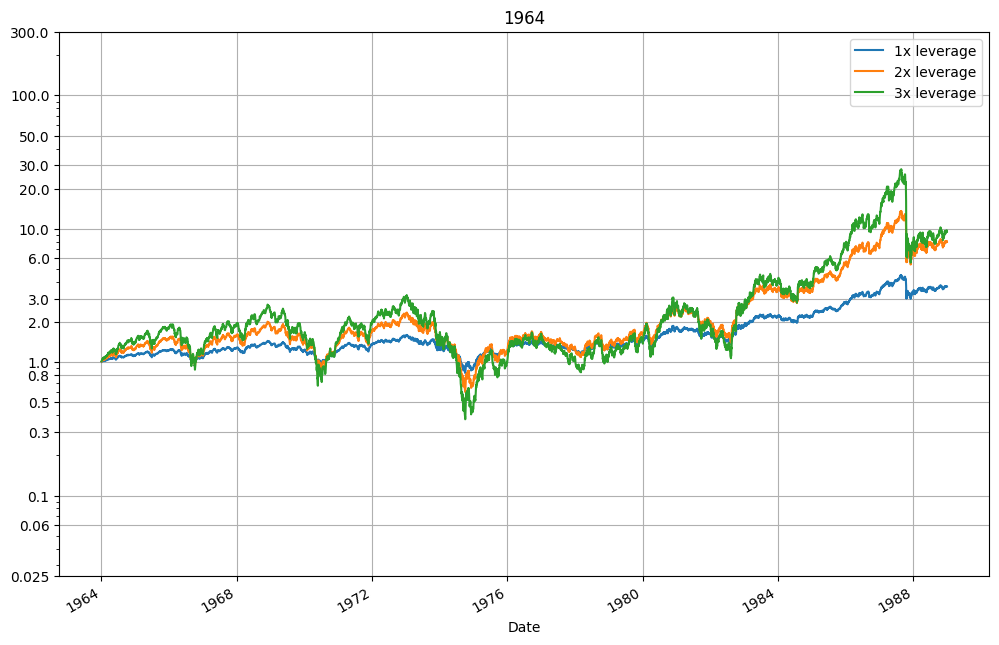

-------------------------
the year is 1965


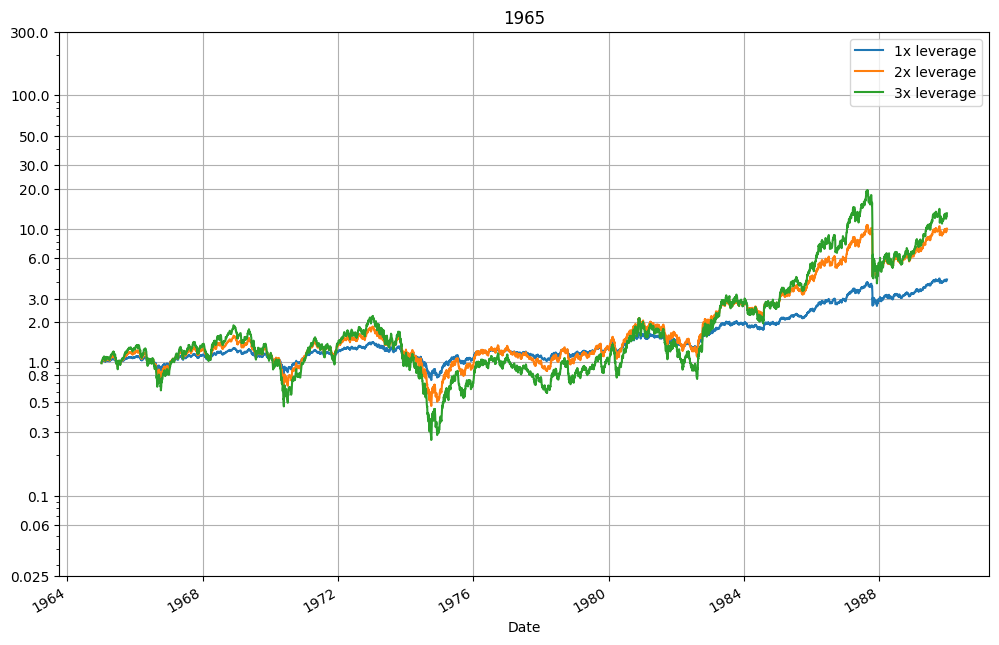

-------------------------
the year is 1966


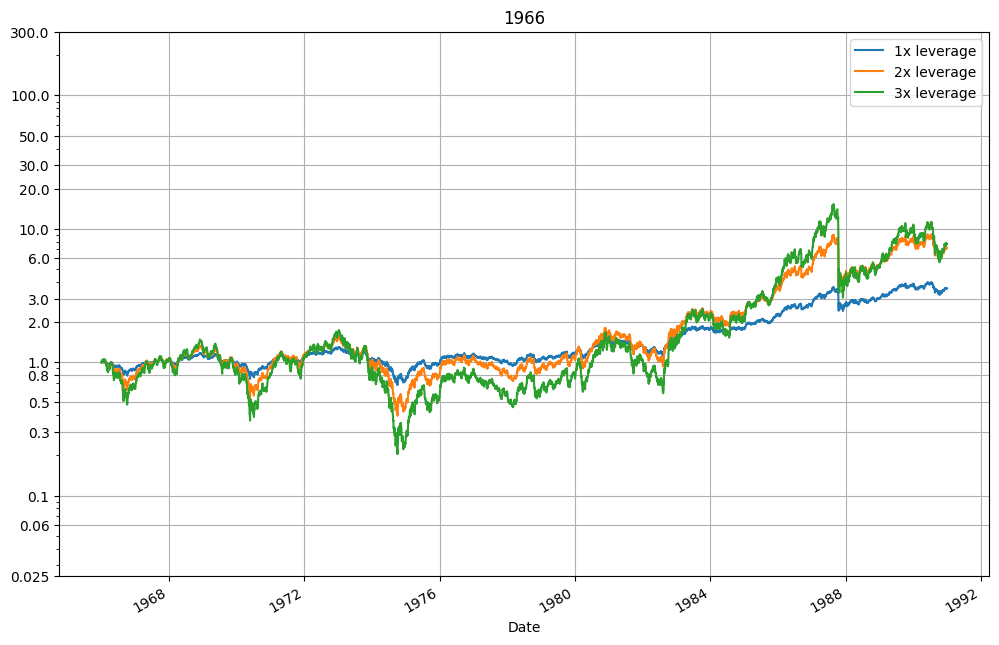

-------------------------
the year is 1967


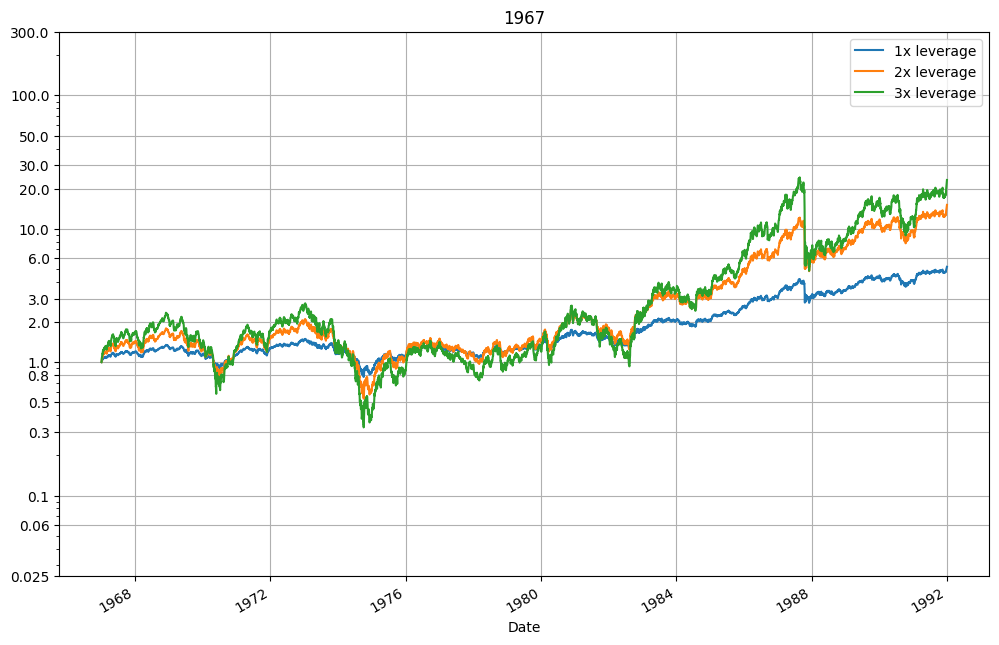

-------------------------
the year is 1968


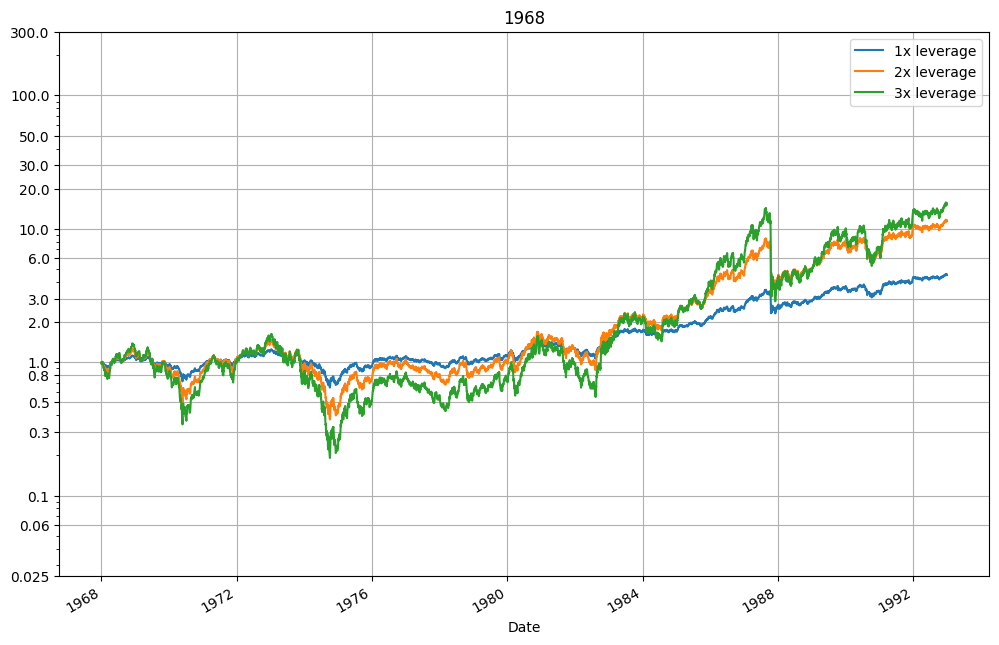

-------------------------
the year is 1969


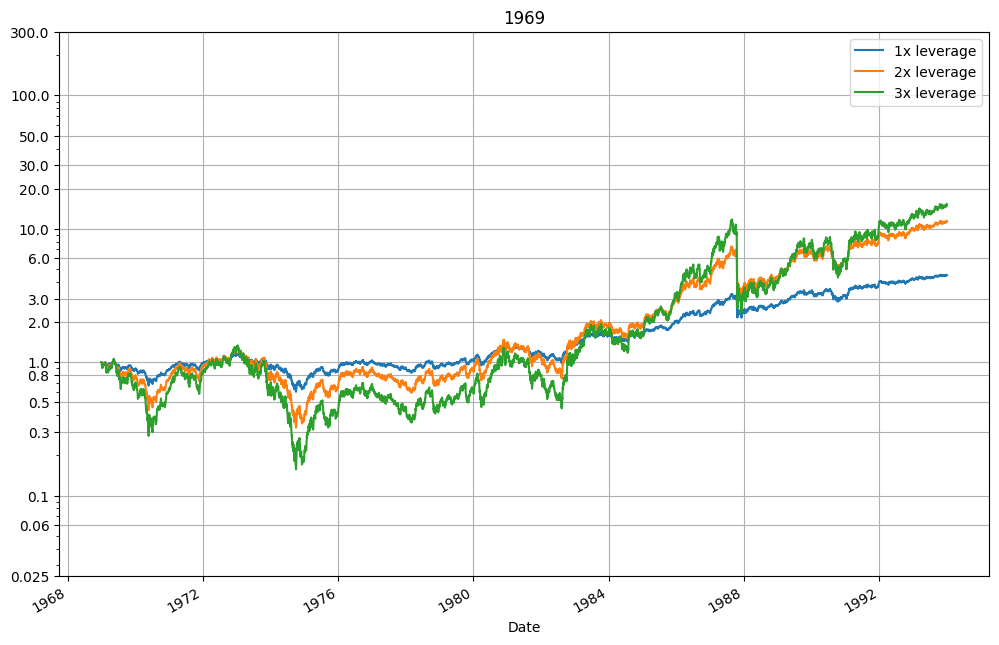

-------------------------
the year is 1970


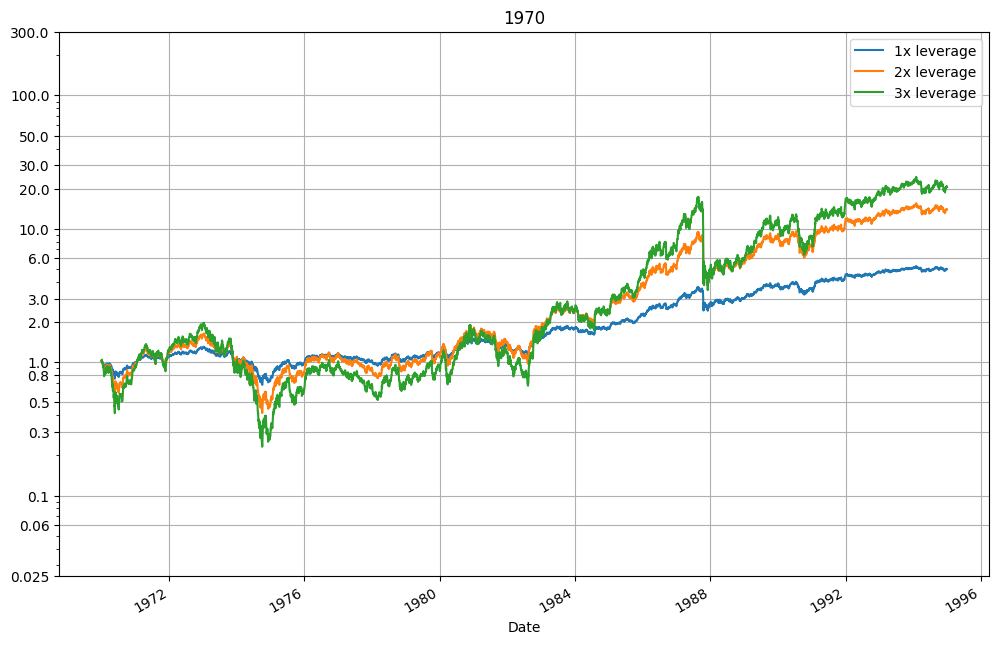

-------------------------
the year is 1971


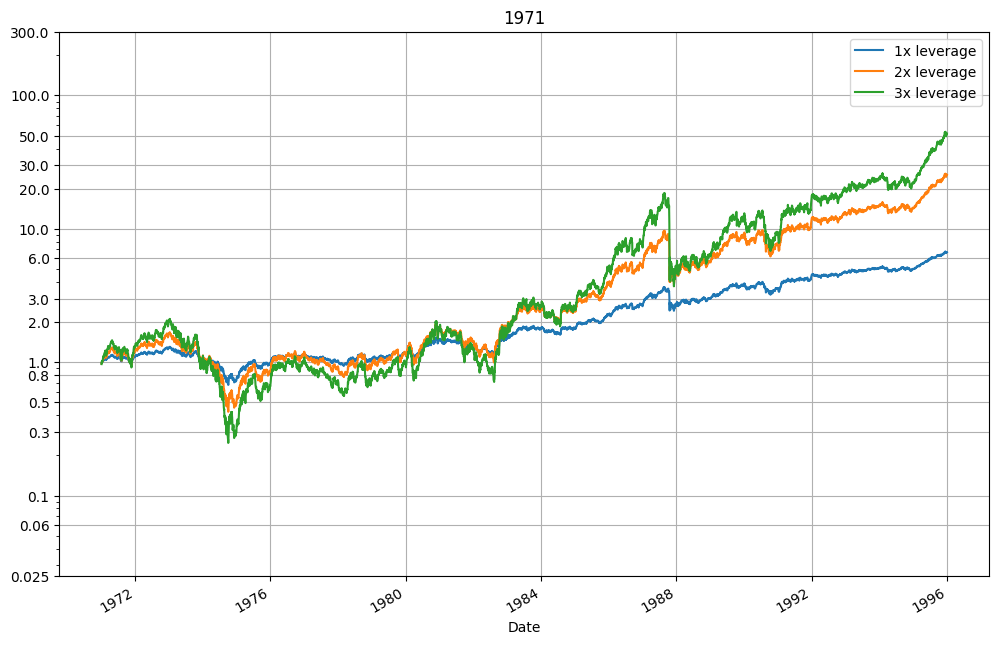

-------------------------
the year is 1972


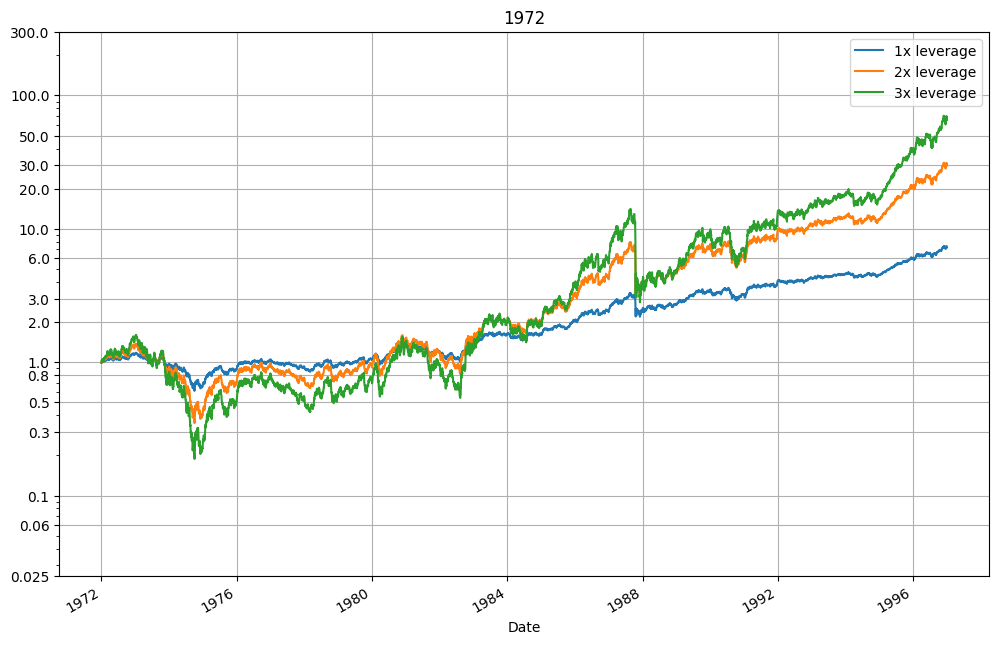

-------------------------
the year is 1973


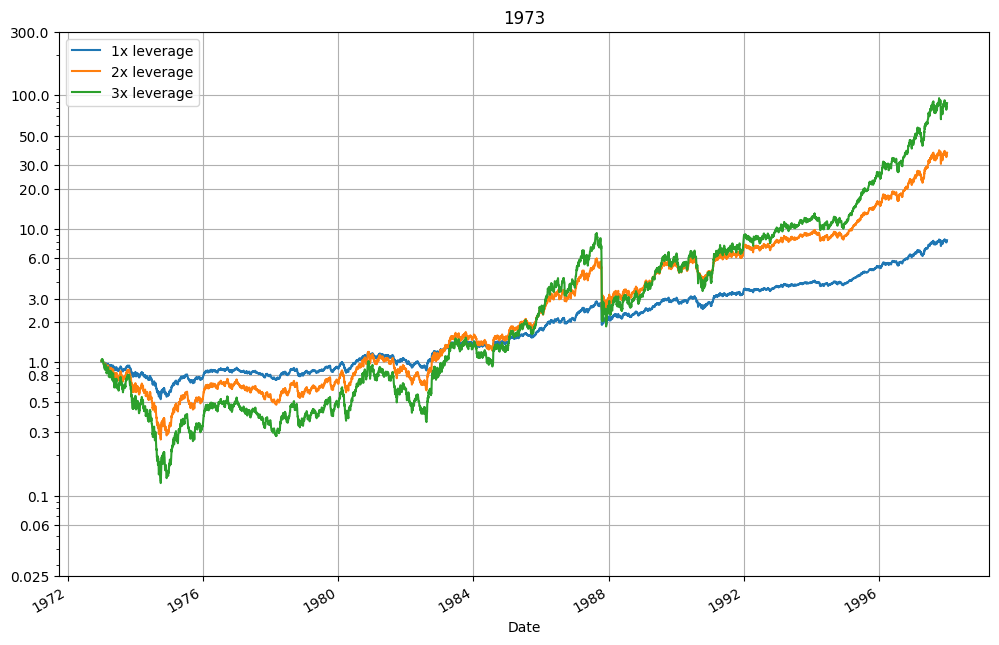

-------------------------
the year is 1974


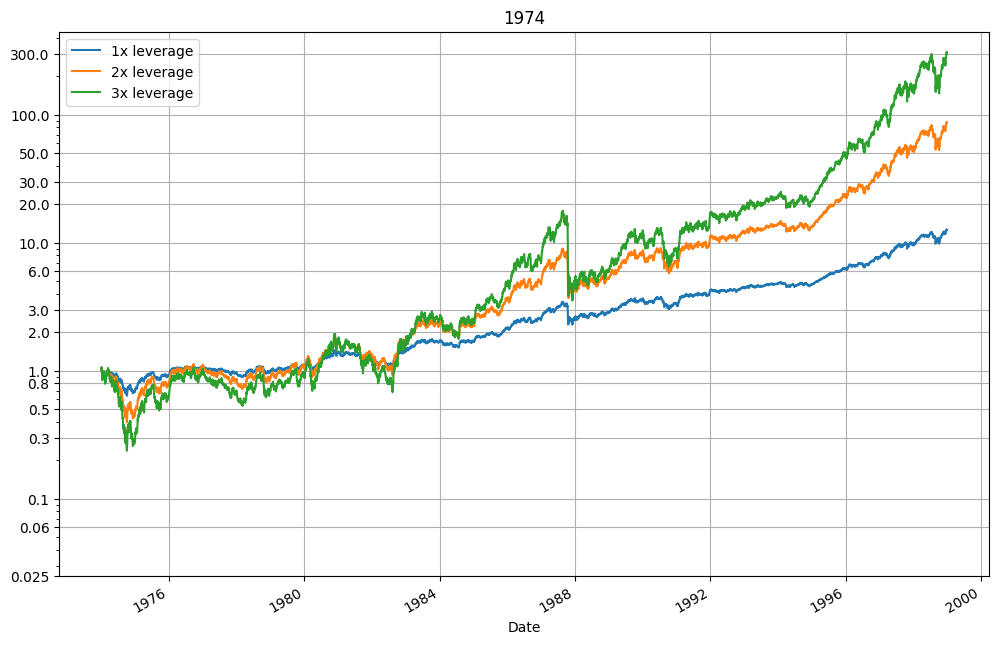

-------------------------
the year is 1975


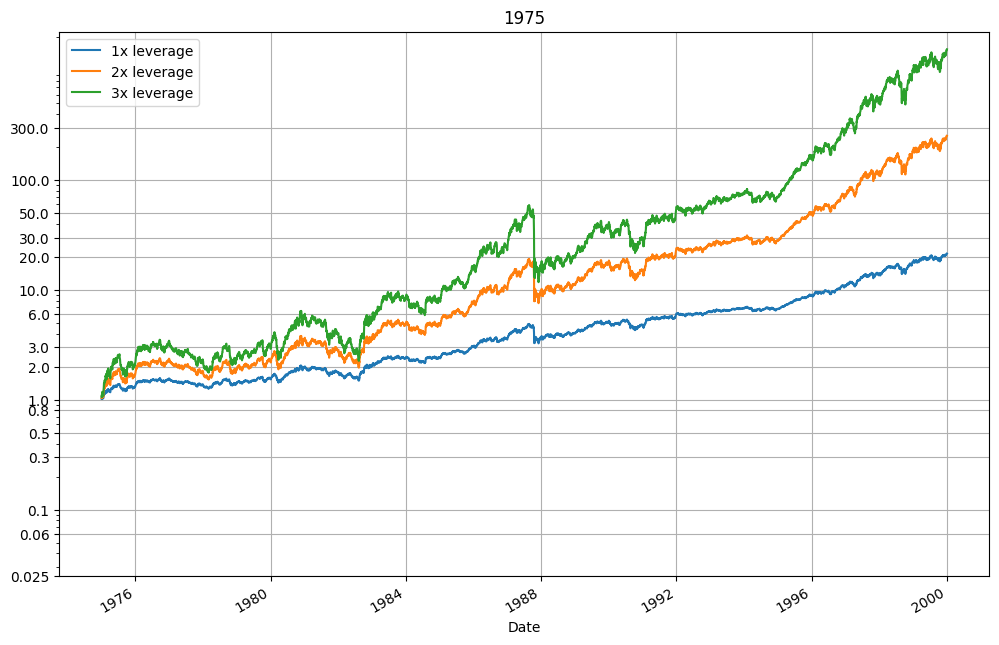

-------------------------
the year is 1976


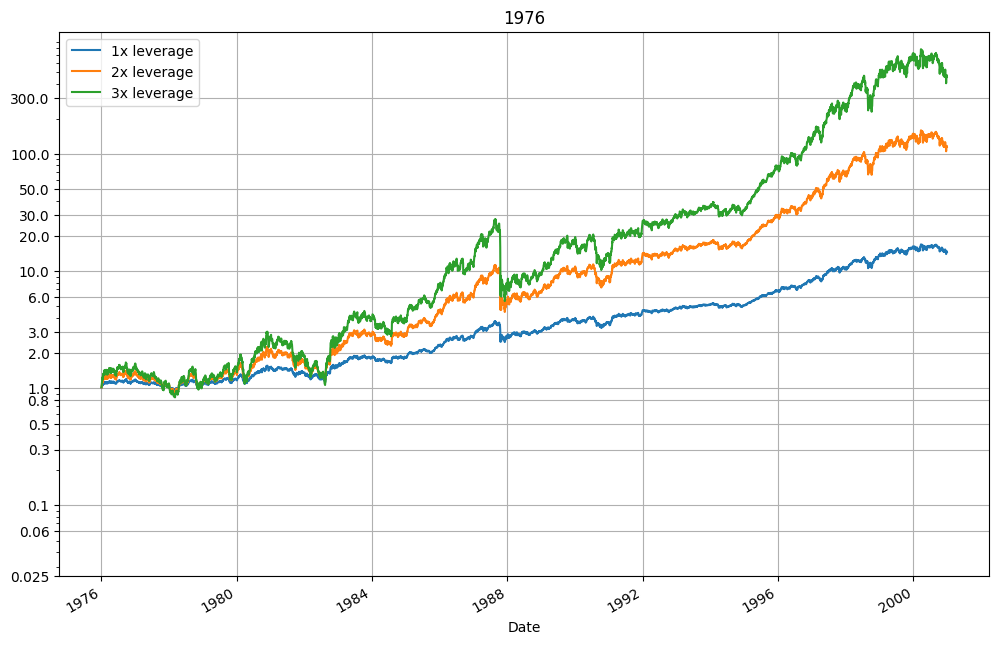

-------------------------
the year is 1977


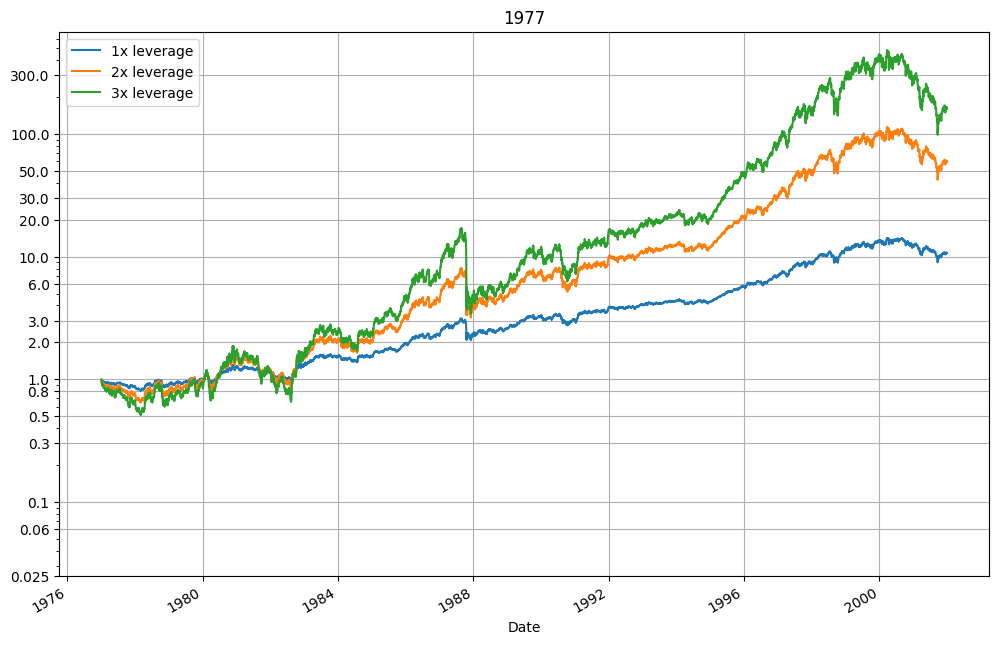

-------------------------
the year is 1978


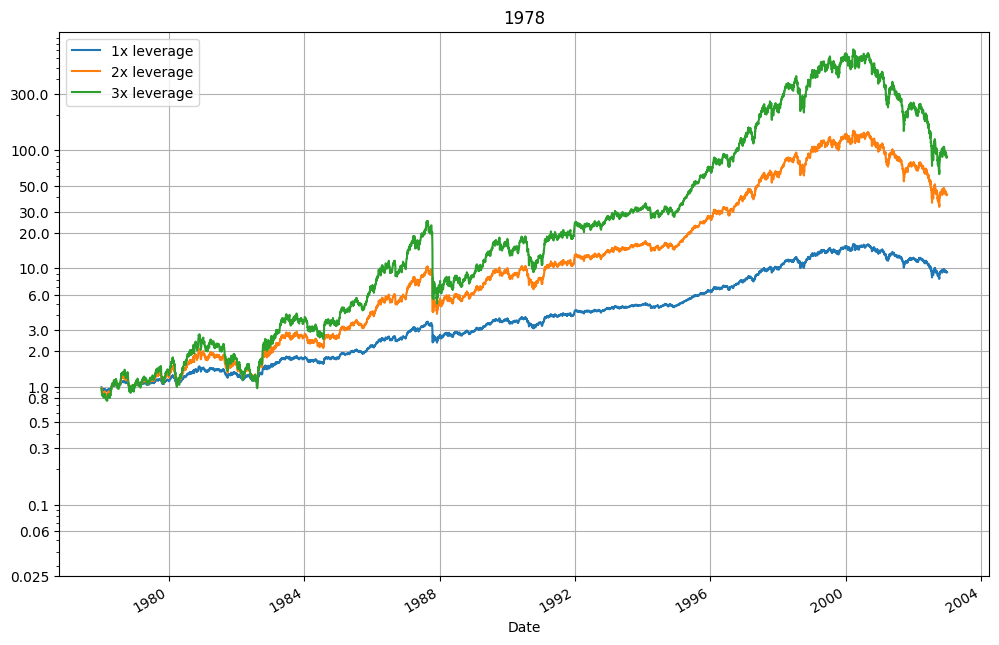

-------------------------
the year is 1979


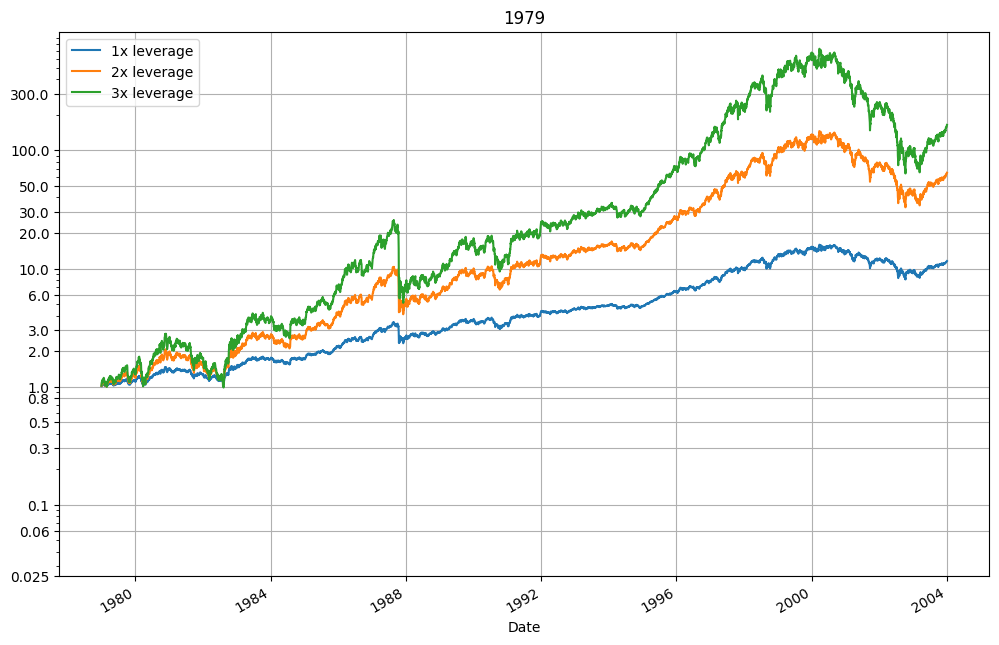

-------------------------
the year is 1980


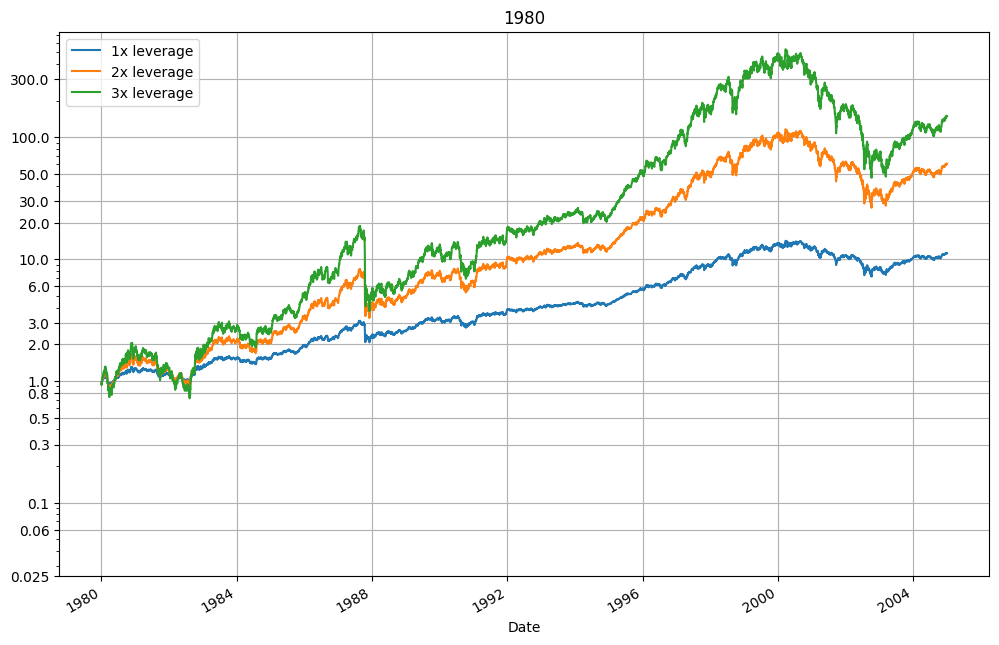

-------------------------
the year is 1981


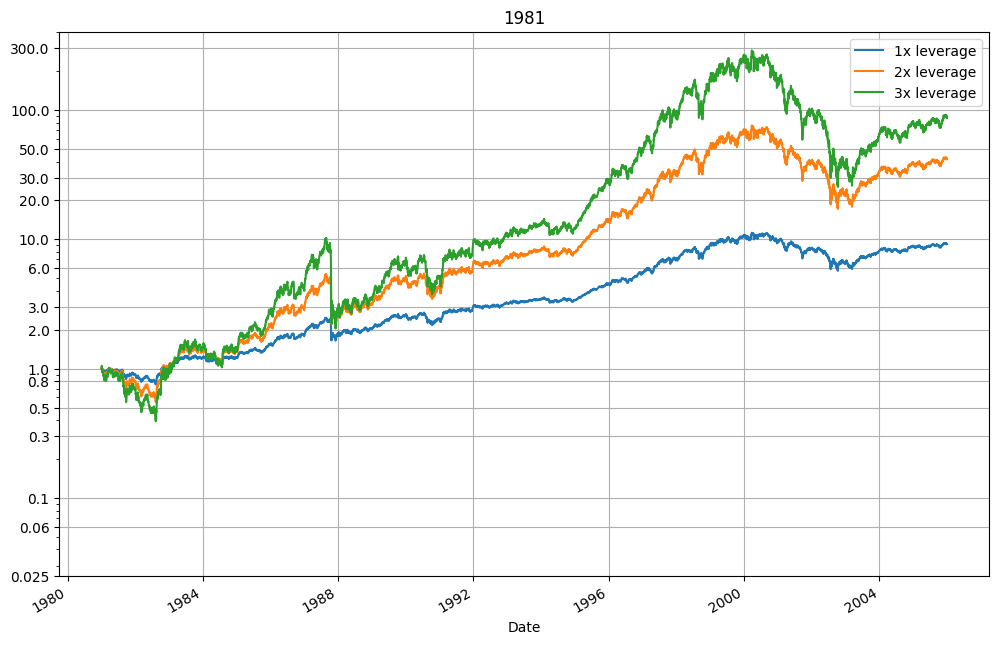

-------------------------
the year is 1982


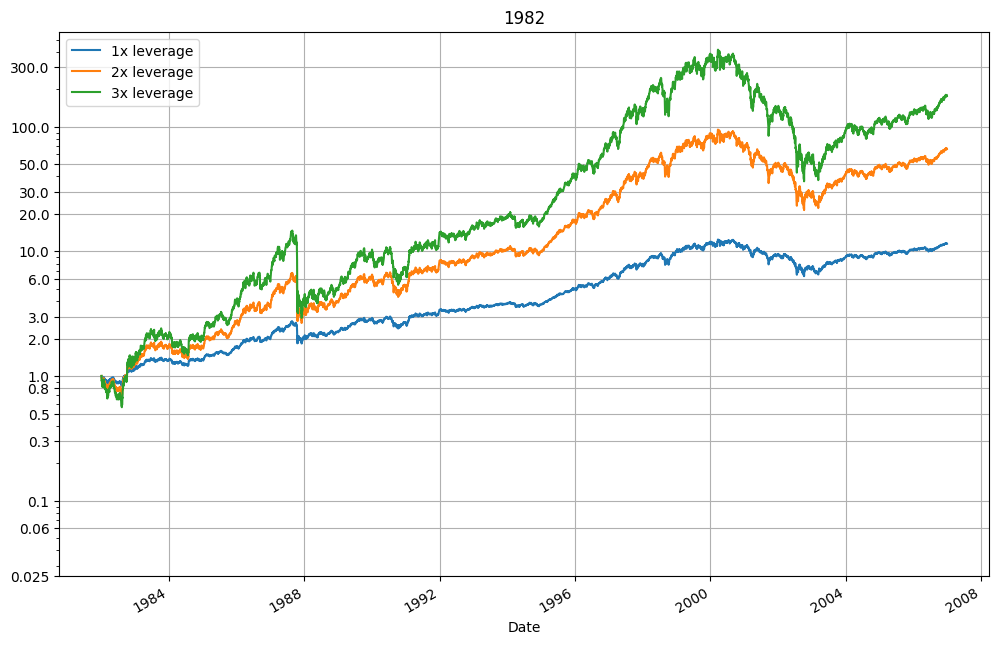

-------------------------
the year is 1983


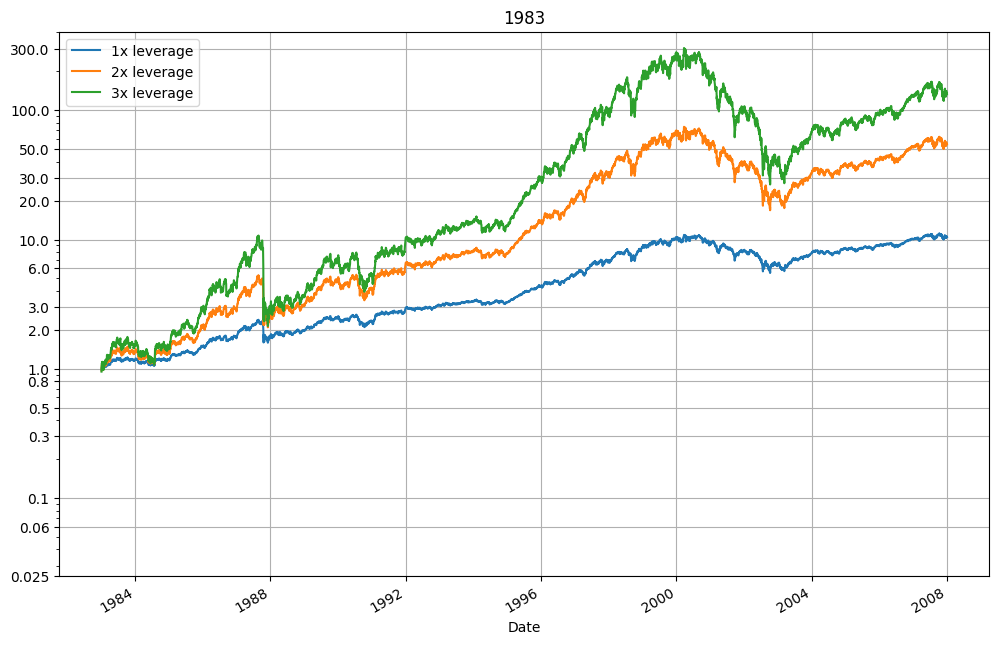

-------------------------
the year is 1984


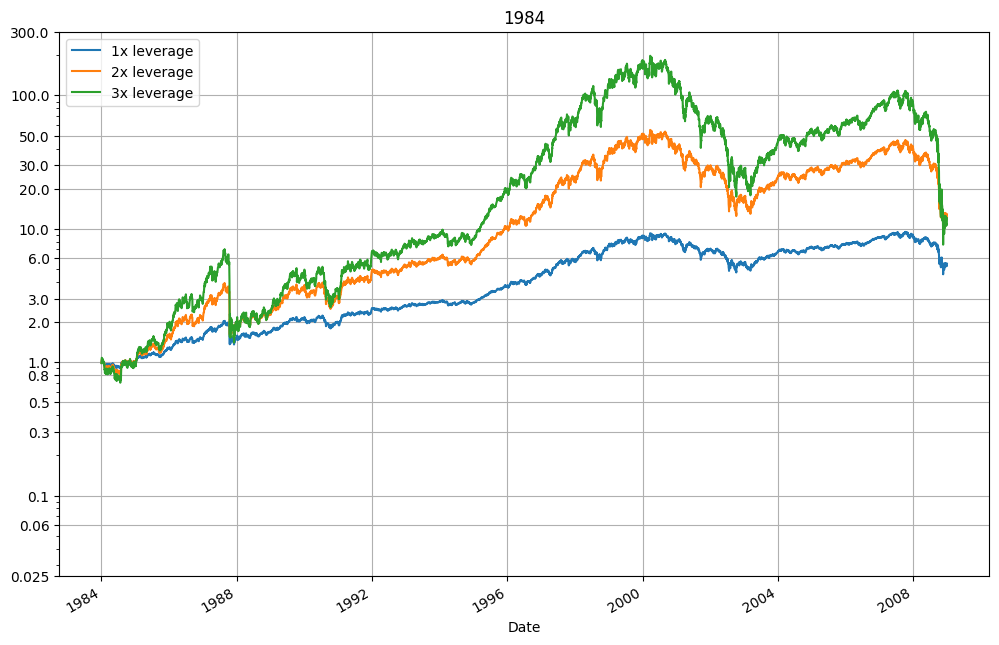

-------------------------
the year is 1985


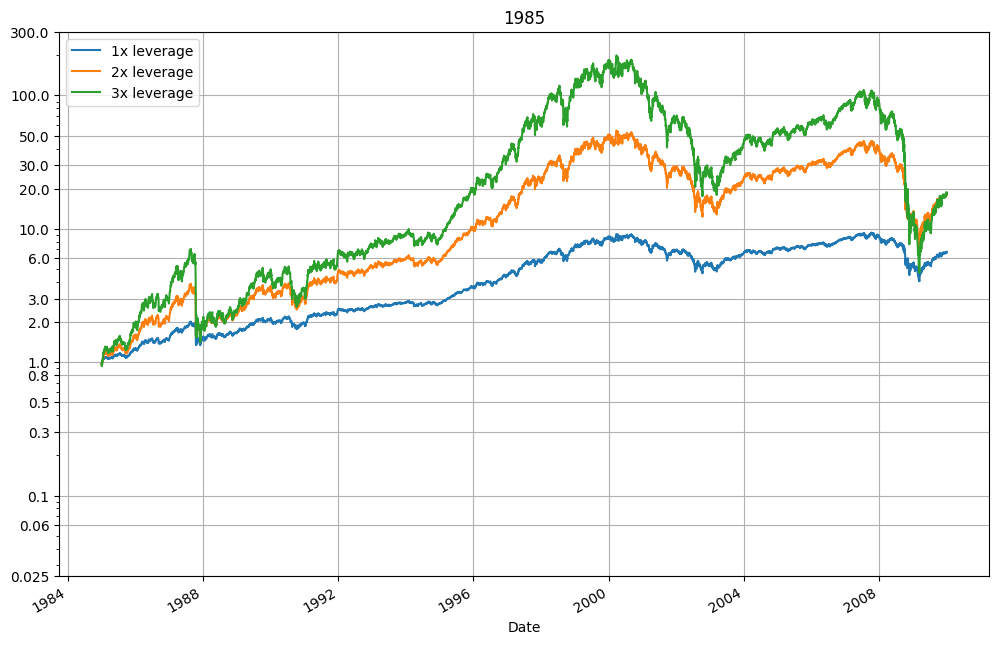

-------------------------
the year is 1986


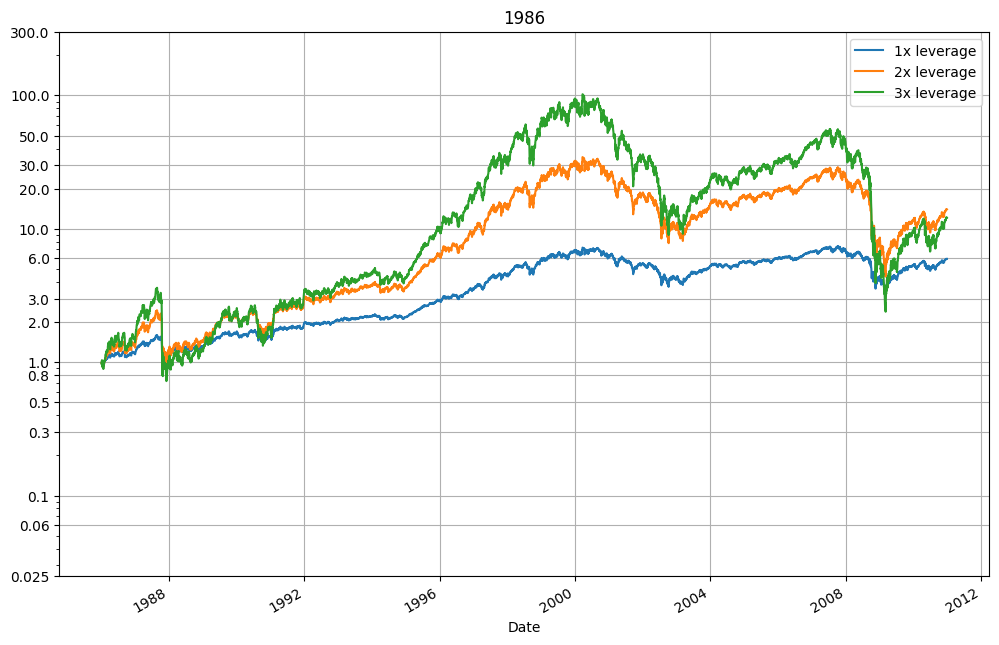

-------------------------
the year is 1987


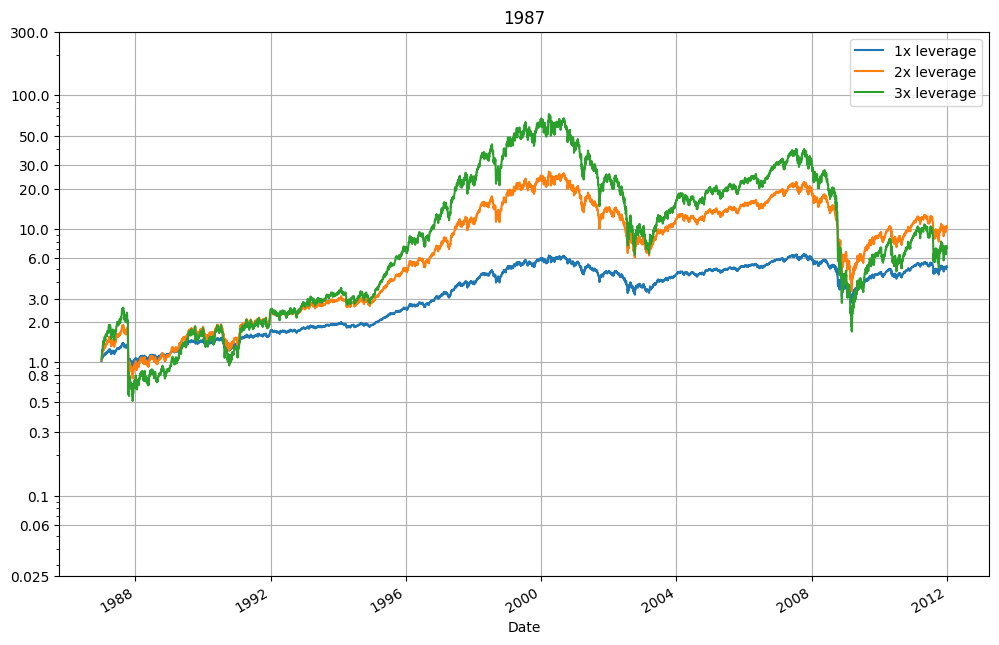

-------------------------
the year is 1988


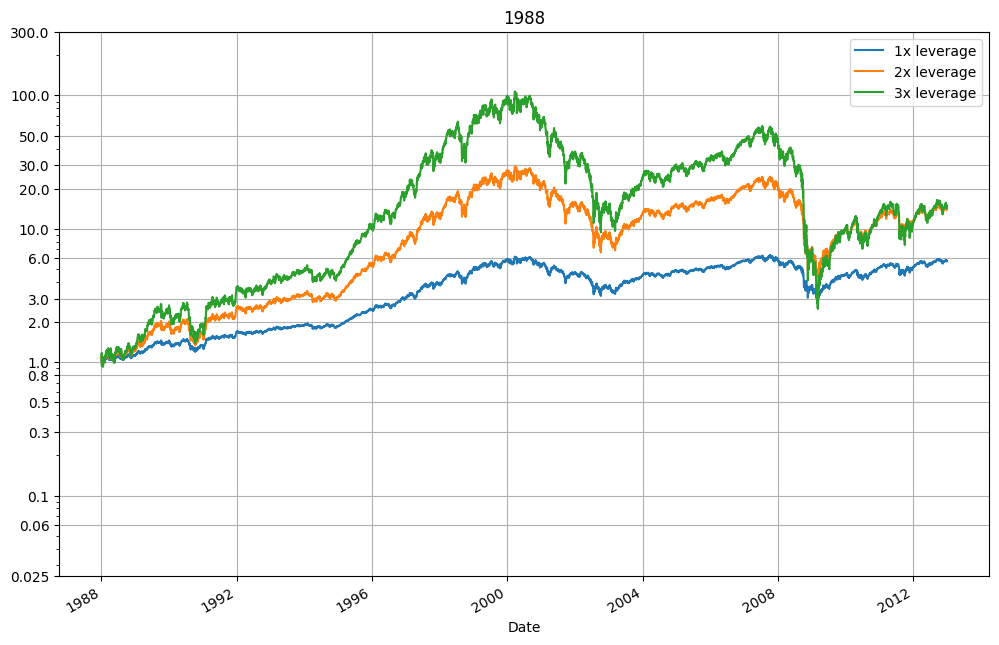

-------------------------
the year is 1989


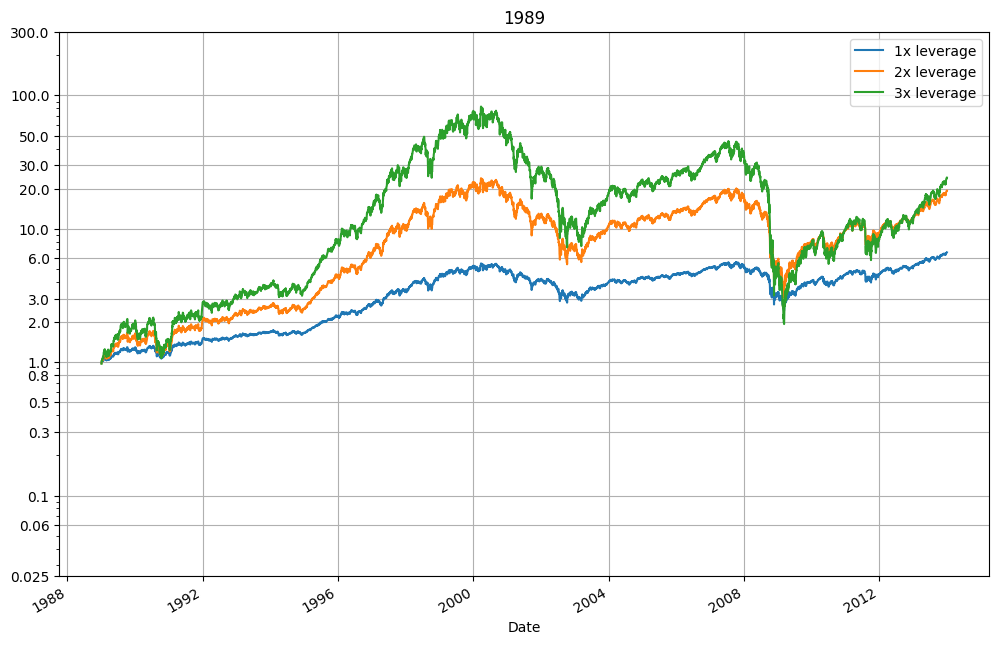

-------------------------
the year is 1990


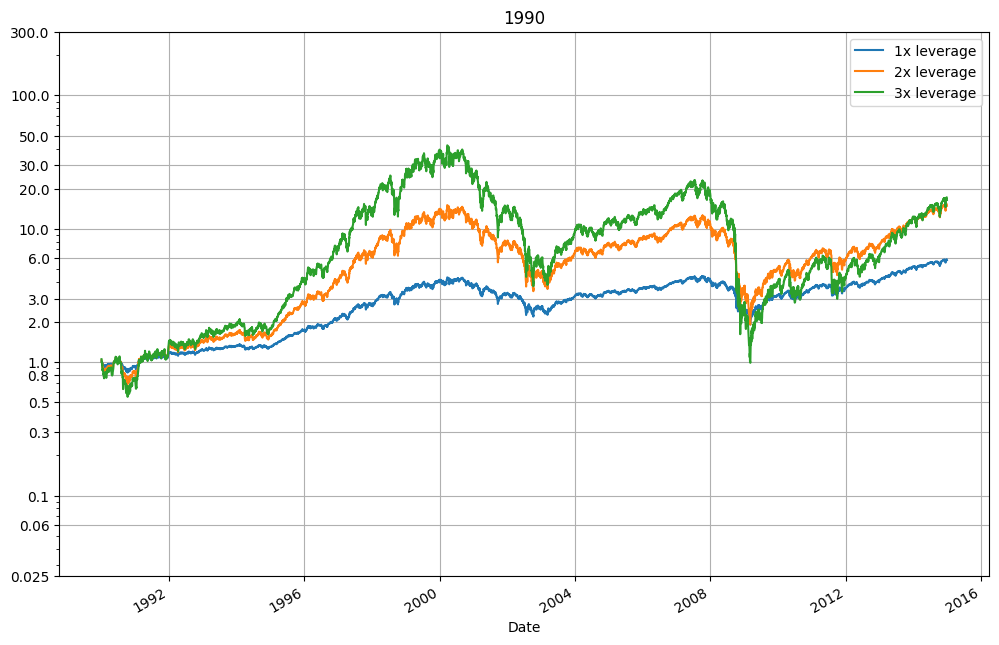

-------------------------
the year is 1991


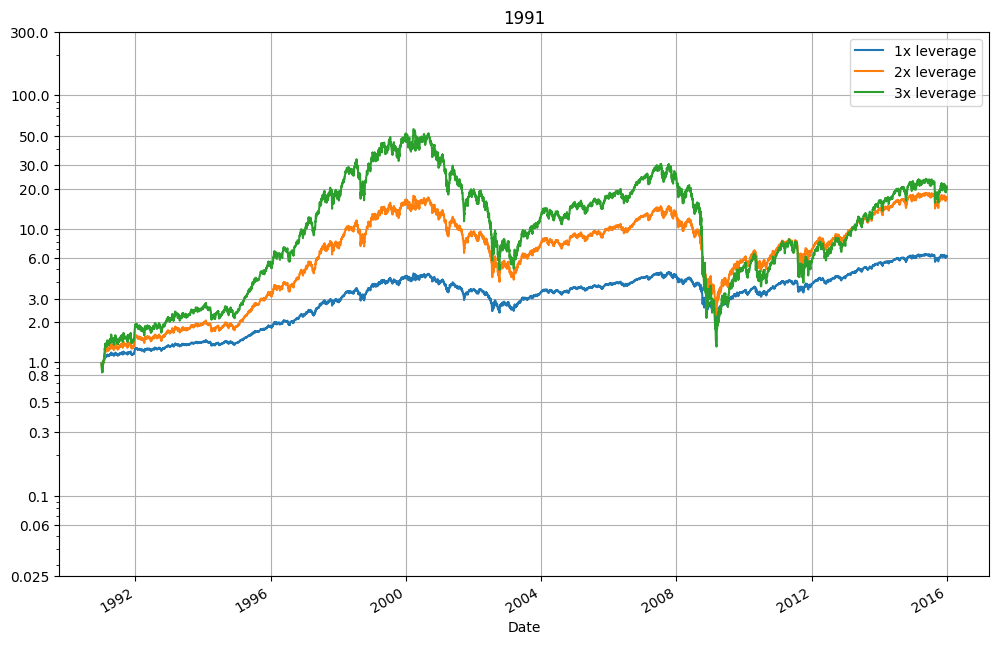

-------------------------
the year is 1992


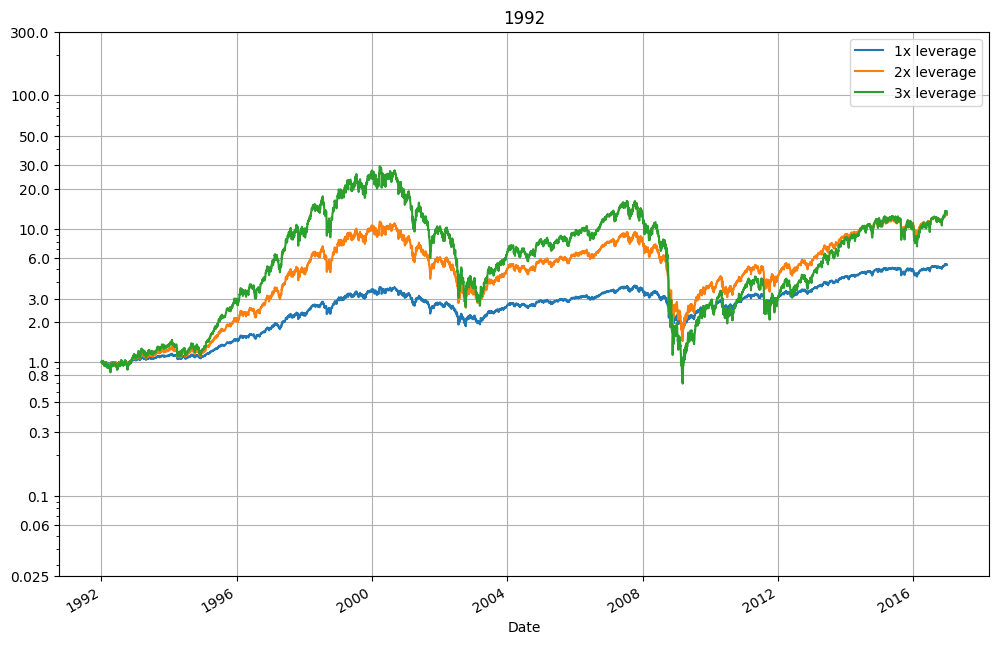

-------------------------
the year is 1993


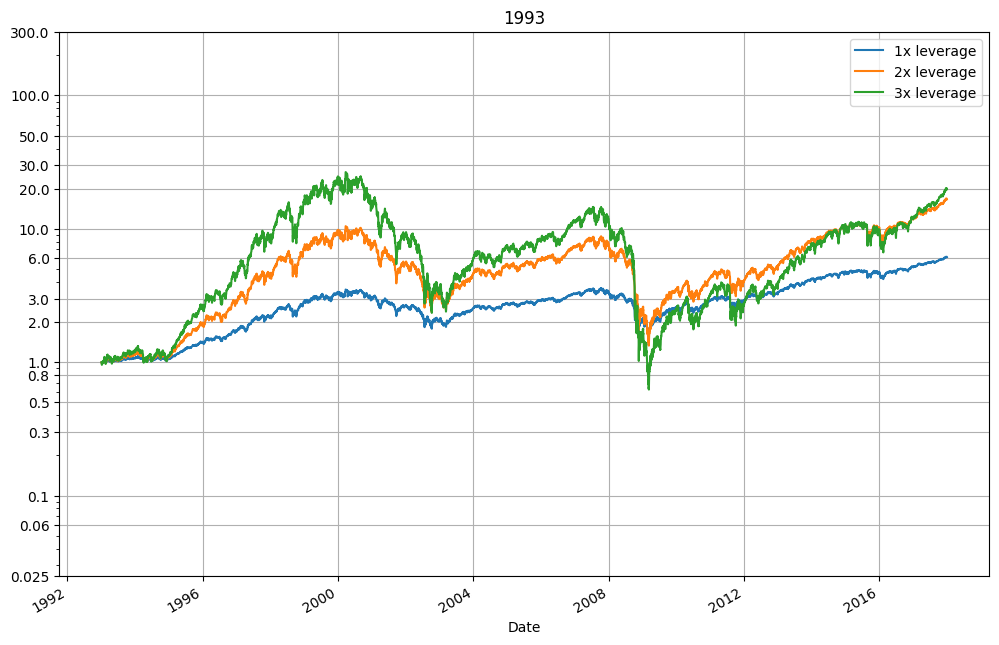

-------------------------
the year is 1994


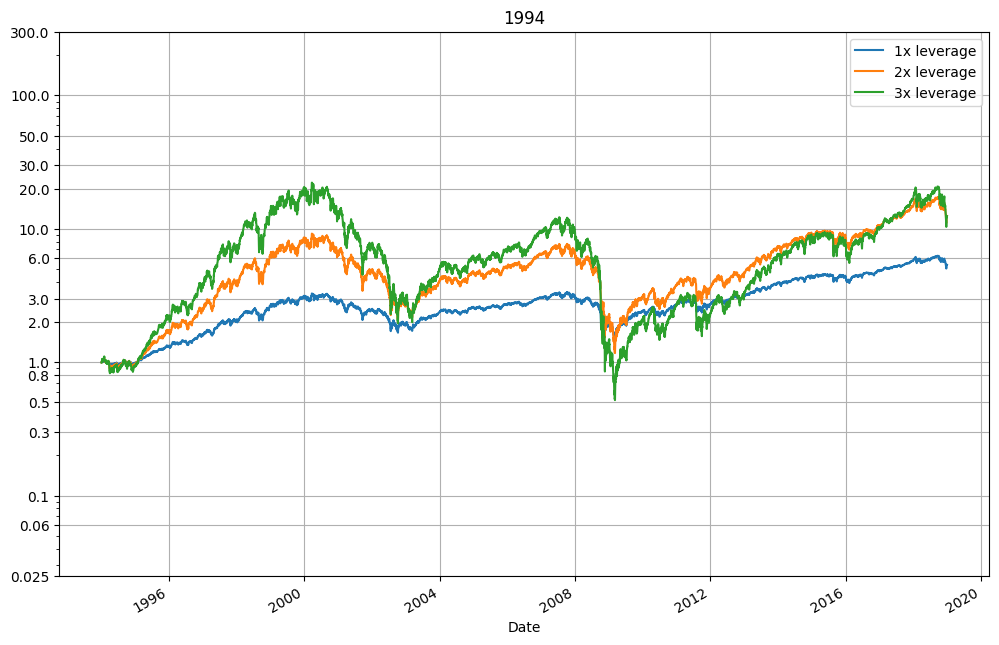

-------------------------
the year is 1995


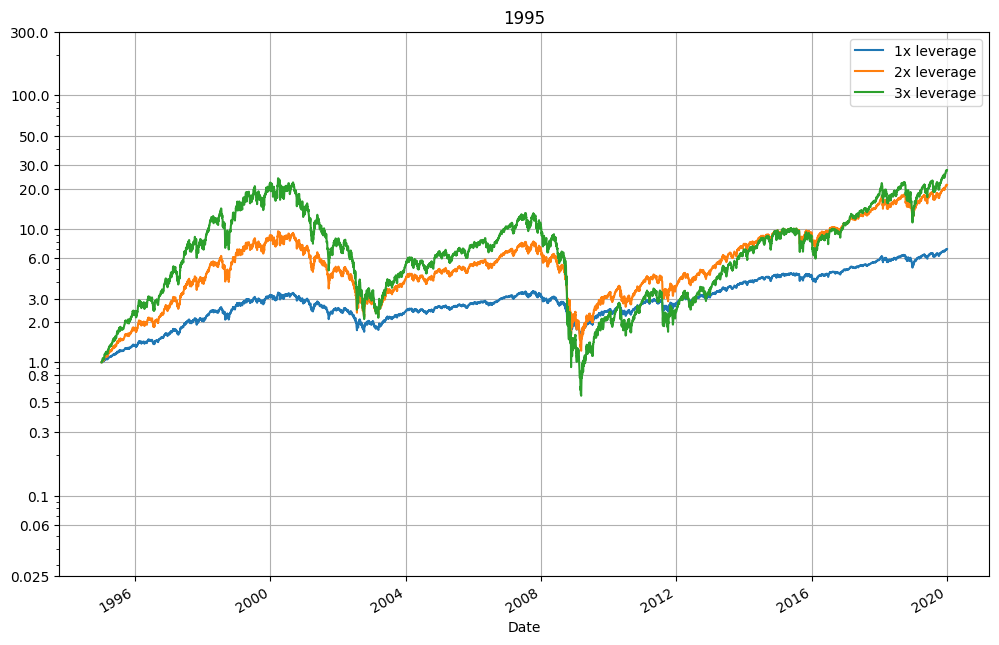

-------------------------
the year is 1996


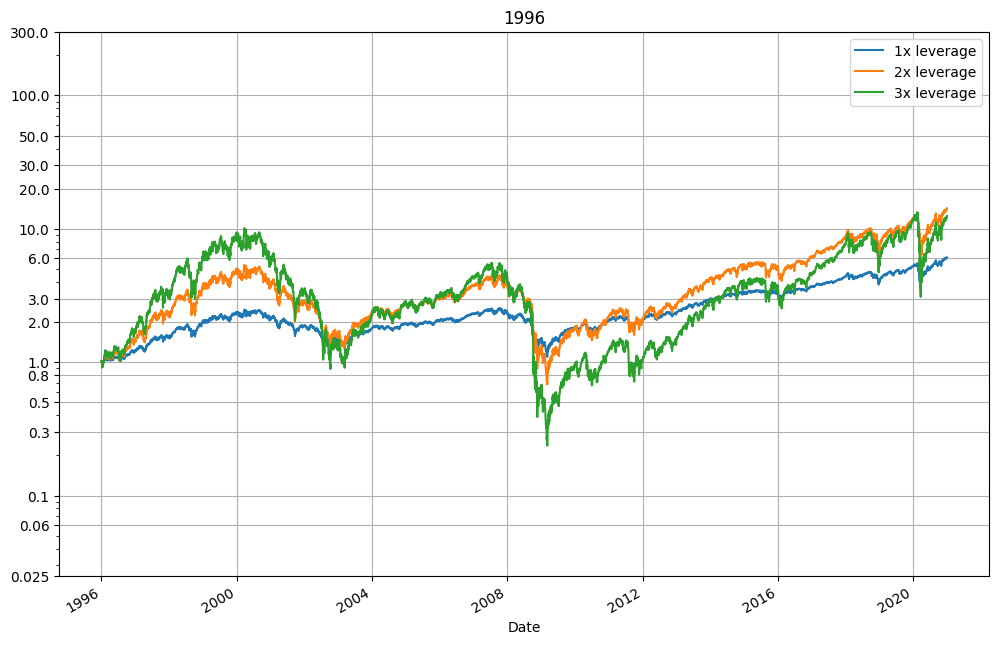

-------------------------
the year is 1997


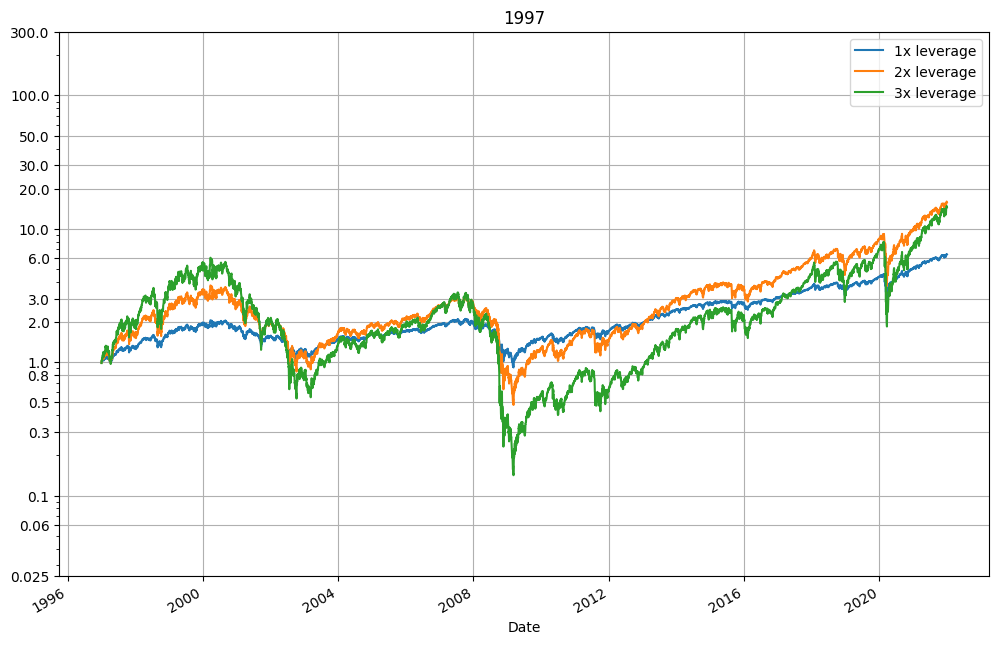

-------------------------
the year is 1998


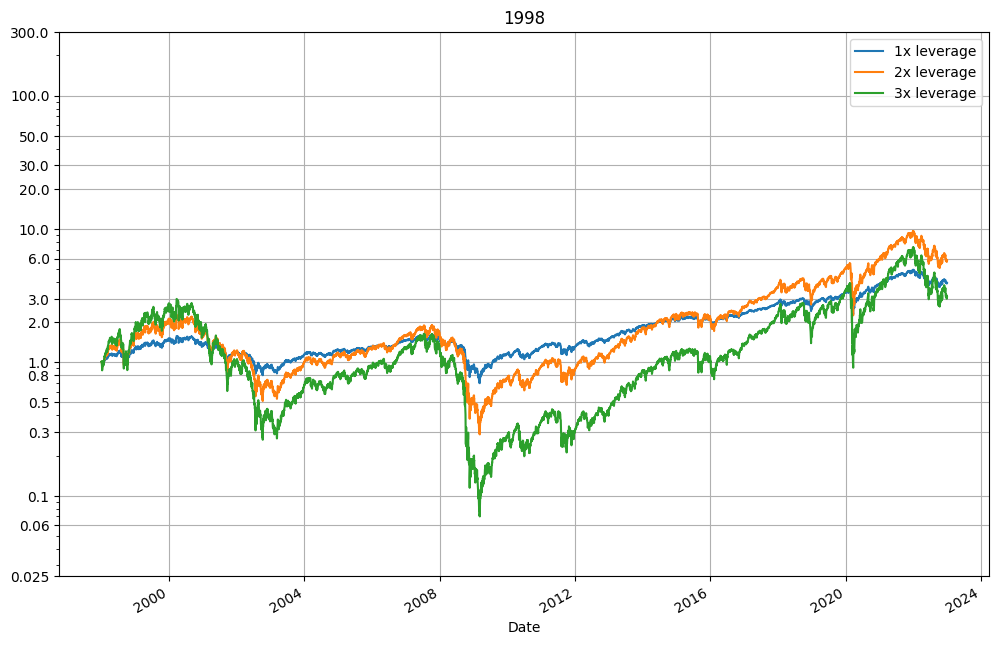

-------------------------
the year is 1999


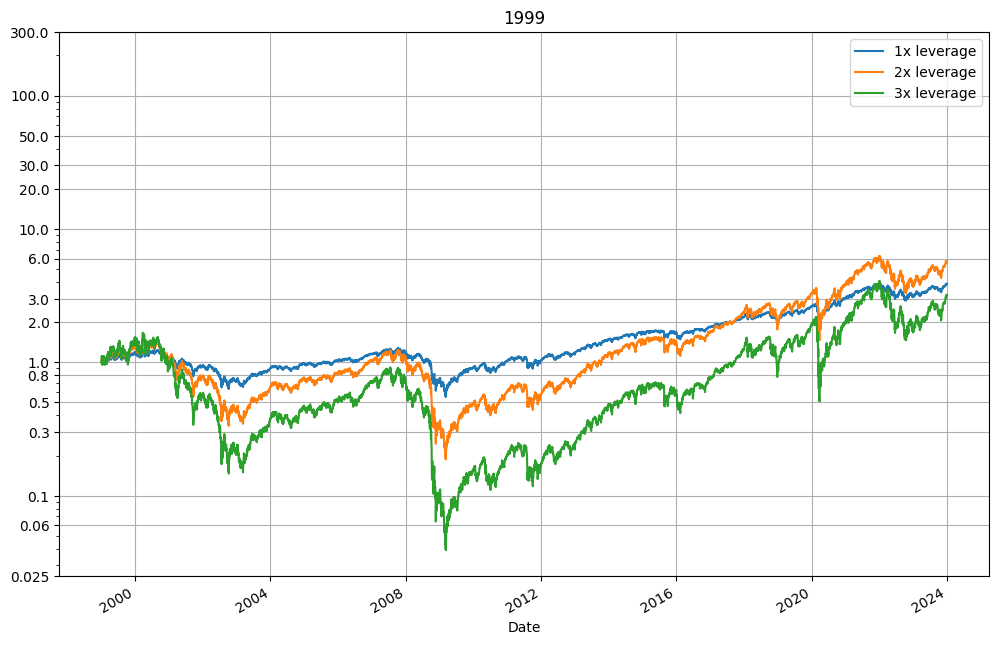

-------------------------


In [326]:
returns = []
for year in range(1960,2000):
    date = dt.datetime(year,1,1)
    year_num = 25
    instance_df = df.loc[(df['Date'] >= date) & (df['Date'] < date + pd.DateOffset(years= year_num))]
    instance_df["1x leverage"] = np.cumprod(instance_df["% change close"]*1+1)
    instance_df["2x leverage"] = np.cumprod(instance_df["% change close"]*2+1)
    instance_df["3x leverage"] = np.cumprod(instance_df["% change close"]*3+1)
    instance_df["4x leverage"] = np.cumprod(instance_df["% change close"]*4+1)
    print(f"the year is {year}")
    instance_df.set_index('Date')[["1x leverage","2x leverage","3x leverage"]].rolling(1).mean(
    ).plot(figsize=(12, 8), title=year, logy=True, grid=True)
    plt.yticks(np.array([0.025,0.06,0.1,0.3,0.5,0.8,1,2,3,6,10,20,30,50,100,300]), 
               labels = np.array([0.025,0.06,0.1,0.3,0.5,0.8,1,2,3,6,10,20,30,50,100,300]))
    plt.savefig(p, format='pdf')  
    plt.show()
    print("-----"*5)
p.close()

In [57]:
50*252

12600

In [327]:
SNP_MEAN=0.000307

In [336]:
pseudo_market_results = pd.DataFrame(columns=['market_mean', 'lev1','lev2','lev3','lev4'])

In [337]:
amplify = 1
for i in range(10000):
    fake_market = np.random.normal(0.000307,0.011958,12600)
#     fake_market_normal = fake_market - fake_market.mean()
#     fake_market = fake_market_normal * amplify + SNP_MEAN
#     fake_market = fake_market - fake_market.mean()  + SNP_MEAN
    lev1 = np.prod((fake_market * 1 + 1))
    lev2 = np.prod((fake_market * 2 + 1))
    lev3 = np.prod((fake_market * 3 + 1))
    lev4 = np.prod((fake_market * 4 + 1))
    pseudo_market_results.loc[len(pseudo_market_results.index)] = [fake_market.mean(), lev1,lev2,lev3,lev4]


In [338]:
pseudo_market_results.describe()

market_mean          lev1          lev2          lev3          lev4
count  10000.000000  10000.000000  1.000000e+04  1.000000e+04  1.000000e+04
mean       0.000307     47.301973  2.879283e+03  2.184987e+05  5.211110e+06
std        0.000105    123.290297  8.433983e+04  1.401104e+07  3.886584e+08
min       -0.000083      0.142340  3.307498e-03  1.245334e-05  7.505572e-09
25%        0.000235      7.810321  1.006543e+01  2.130894e+00  7.303054e-02
50%        0.000307     19.426046  6.245607e+01  3.304653e+01  2.852926e+00
75%        0.000377     46.994148  3.629831e+02  4.636986e+02  9.707803e+01
max        0.000772   6710.726748  7.282965e+06  1.279342e+09  3.623603e+10

In [346]:
pseudo_market_results[['lev1','lev2','lev3','lev4']].quantile(np.arange(0,1.05,0.05))

lev1          lev2          lev3          lev4
0.00     0.142340  3.307498e-03  1.245334e-05  7.505572e-09
0.05     2.257525  8.442772e-01  5.154408e-02  5.146399e-04
0.10     3.626724  2.167223e+00  2.117731e-01  3.403047e-03
0.15     4.861258  3.914984e+00  5.197468e-01  1.112528e-02
0.20     6.293198  6.522227e+00  1.107598e+00  3.039616e-02
0.25     7.810321  1.006543e+01  2.130894e+00  7.303054e-02
0.30     9.718490  1.553613e+01  4.083631e+00  1.767607e-01
0.35    11.819919  2.316109e+01  7.436856e+00  3.917217e-01
0.40    14.089438  3.268859e+01  1.246201e+01  7.727700e-01
0.45    16.616120  4.541572e+01  2.049982e+01  1.495985e+00
0.50    19.426046  6.245607e+01  3.304653e+01  2.852926e+00
0.55    22.705796  8.546588e+01  5.282489e+01  5.344474e+00
0.60    26.816186  1.190717e+02  8.671522e+01  1.028026e+01
0.65    31.884424  1.688152e+02  1.457398e+02  2.066291e+01
0.70    38.315088  2.419102e+02  2.523451e+02  4.302743e+01
0.75    46.994148  3.629831e+02  4.636986e+02  9.707803e+01
0.80    60.215749  5.995524e+02  9.749686e+02  2.628983e+02
0.85    77.564944  9.948408e+02  2.093556e+03  7.102111e+02
0.90   107.130182  1.898289e+03  5.494817e+03  2.647871e+03
0.95   169.345786  4.751689e+03  2.220474e+04  1.669328e+04
1.00  6710.726748  7.282965e+06  1.279342e+09  3.623603e+10

<Axes: >

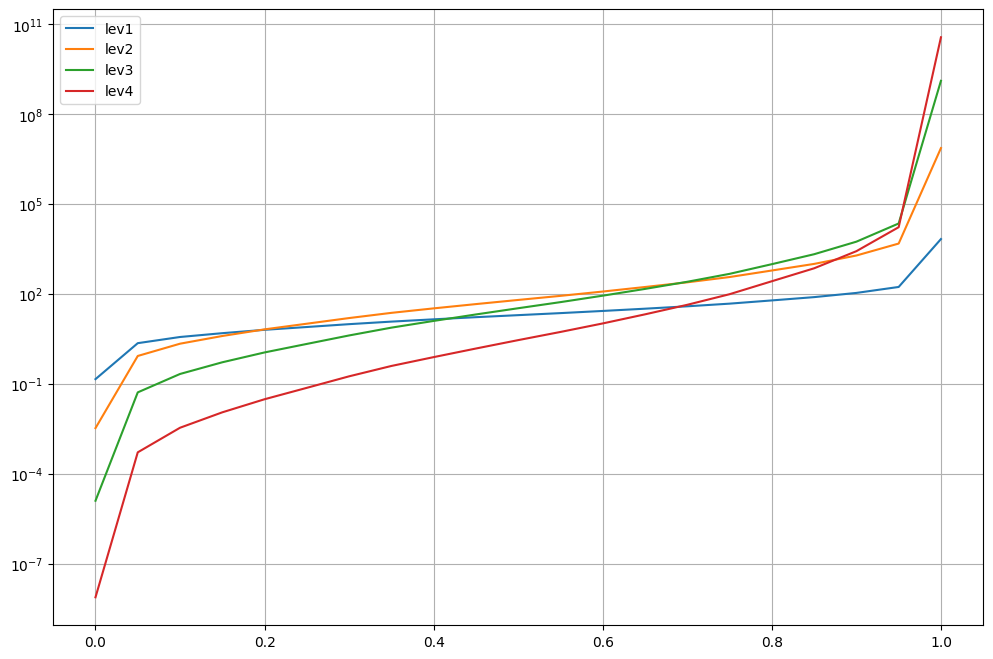

In [345]:
pseudo_market_results[['lev1','lev2','lev3','lev4']].quantile(np.arange(0,1.05,0.05)).plot(figsize=(12, 8), logy=True, grid=True)

In [167]:
    fake_market = np.random.normal(0.000307,0.011958,12600)
    fake_market_normal = fake_market - fake_market.mean()
    fake_market = fake_market_normal * amplify + SNP_MEAN
    lev1 = np.prod((fake_market * 1 + 1))
    lev2 = np.prod((fake_market * 2 + 1))
    lev3 = np.prod((fake_market * 3 + 1))
    lev4 = np.prod((fake_market * 4 + 1))

In [168]:
fake_market

array([ 0.0003799 , -0.03078367,  0.03430432, ..., -0.03559044,
       -0.03207553,  0.02292146])

In [252]:
size = 252 * 30

In [227]:
fake_market.mean(), fake_market.max(), fake_market.min()

(0.00041853132590753006, 0.054590180798478945, -0.04945222998043611)

In [228]:
fake_market_normal = fake_market - fake_market.mean()

In [229]:
amplify = 1
fake_market = fake_market_normal * amplify + SNP_MEAN

In [318]:
fake_market = np.random.normal(SNP_MEAN,0.011958,size)

In [319]:
fake_market.mean()

0.00030710639568402837

In [320]:
lev1 = np.cumprod((fake_market * 1 + 1))
lev2 = np.cumprod((fake_market * 2 + 1))
lev25 = np.cumprod((fake_market * 2.5 + 1))
lev3 = np.cumprod((fake_market * 3 + 1))
lev4 = np.cumprod((fake_market * 4 + 1))

In [321]:
x=np.arange(size)

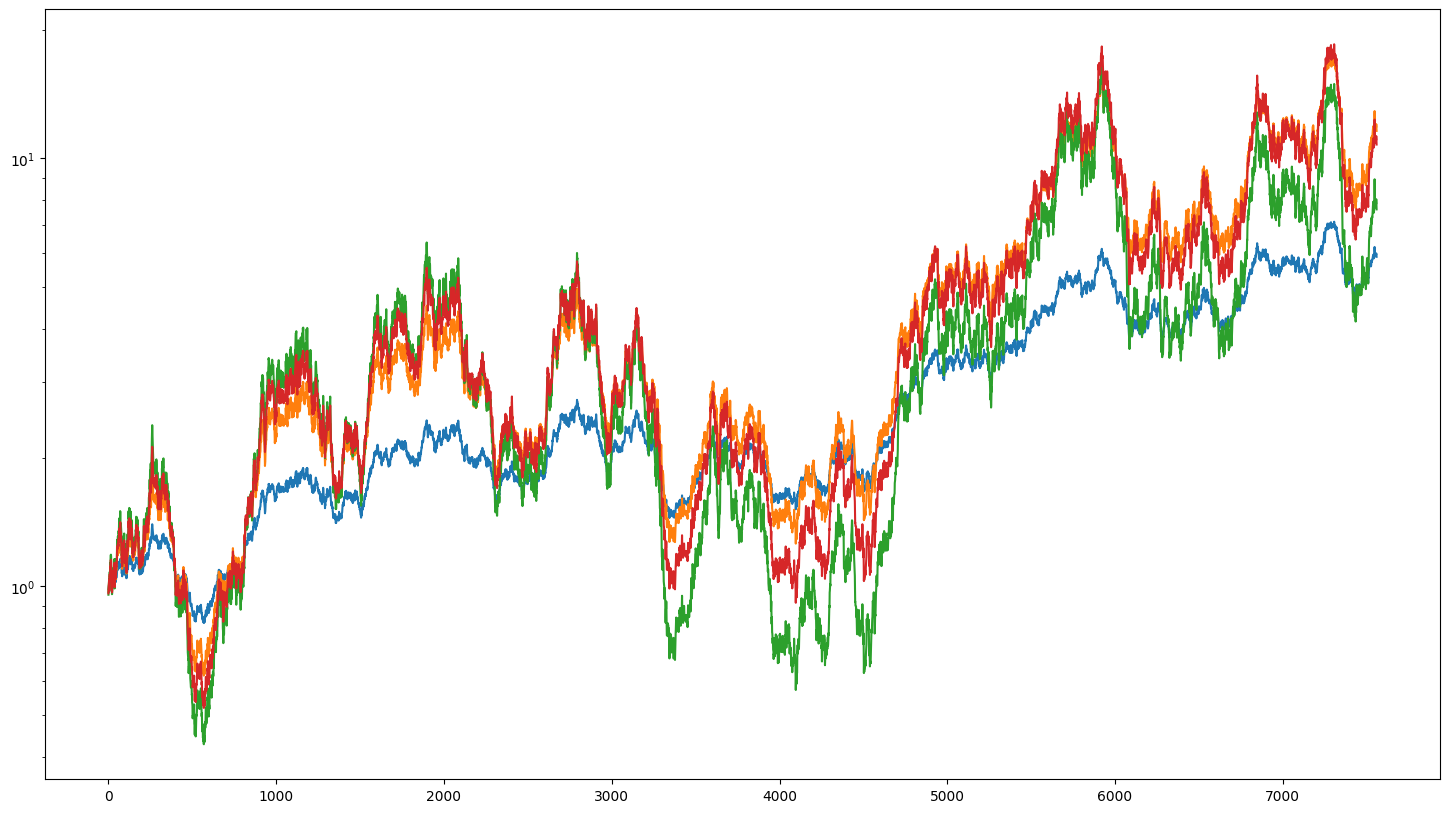

In [322]:
plt.plot(x,lev1,label="lev1")
plt.plot(x,lev2,label="lev2")
plt.plot(x,lev3,label="lev3")
# plt.plot(x,lev4,label="lev4")
plt.plot(x,lev25,label="lev2.5")
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.yscale("log")
plt.show()